# Simple MNIST MLP Classifier

**Description:** Simple example for Multi Layer Perceptron MNIST Classifier <br>
**Dataset:** Classical MNIST dataset <br>
.

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages

import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

    Modify layers size and epochs
    Which accuracy can you obtain?

In [15]:
# layers structure
batch_size = 128
epochs = 10
hlayer1 = 64
hlayer2 = 64

    Prepare Data

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [17]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

#####    Definition of a Simple [784:64:64:10] Network

In [18]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


    Method Fit Trains Network !

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.9012 - val_loss: 0.2013 - val_accuracy: 0.9377
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1659 - accuracy: 0.9504 - val_loss: 0.1437 - val_accuracy: 0.9560
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1232 - accuracy: 0.9639 - val_loss: 0.1200 - val_accuracy: 0.9648
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.1019 - val_accuracy: 0.9689
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9756 - val_loss: 0.0948 - val_accuracy: 0.9728
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0931 - val_accuracy: 0.9713
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9818 - val_loss: 0.0880 - val_accuracy: 0.9735
Epoch 

Test loss: 0.0895015299320221
Test accuracy: 0.9749000072479248
Train accuracy: 0.9908333420753479


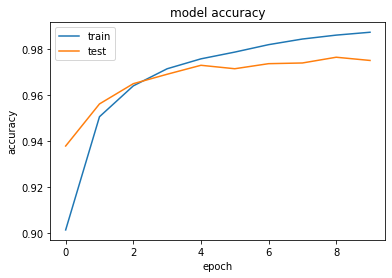

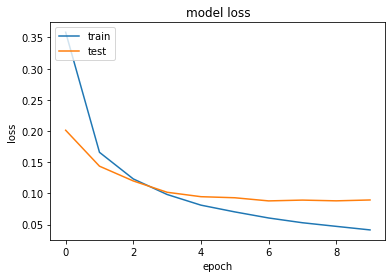

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)